In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno

In [2]:
#Uploading data sets in a format that is uniformed
df1 = pd.read_csv('../data/imdb.title.basics.csv.gz') #basic
df2 = pd.read_csv('../data/bom.movie_gross.csv.gz') #rev_data
df3 = pd.read_csv('../data/tn.movie_budgets.csv.gz') #budget_data
df4 = pd.read_csv('../data/imdb.title.ratings.csv.gz') #ratings

In [3]:
#Looking at our data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#Looking for missing values in the foreign gross column
df2['foreign_gross'].isnull().sum()


1350

In [5]:
#Changing NaN values to floats to change object into float type for easier analysis.
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')
#df2.info()

In [6]:
#Checking our data to see that we still have NaN values in float type and comparing to original NaN values.
df2['foreign_gross'].isna().sum()

1355

In [7]:
#re-naming columns to our defined naming conventions
df2 = df2.rename(columns={'domestic_gross':'dom_gross', 'foreign_gross': 'for_gross' })
#df2.head()

In [8]:
#Dropping the studio column as we don't want to use it.
df2 = df2.drop(columns='studio')
#df2.head()

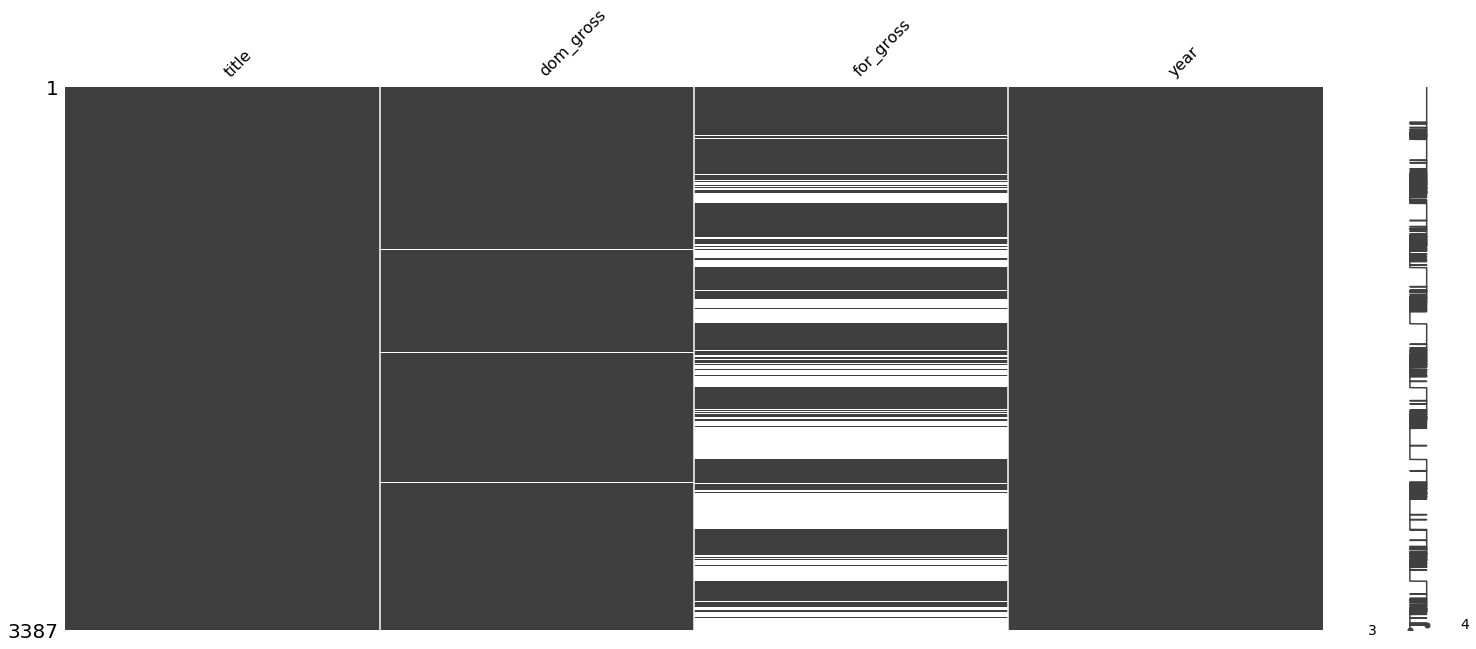

In [9]:
#Visually looking for missing data
#missingno.matrix(df2)

In [10]:
#Checking the size of our dataframe as will continue with more EDA
#df2.shape

In [11]:
# Checking to see if there are rows with missing values for both domestic & foreign NaN, as we would want to drop them
df2 = df2.drop(df2[(df2['dom_gross'] == 'NaN') & (df2['for_gross'] == 'NaN')].index)
#df2.shape
#Note: There aren't any

/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
#Re-naming df2 to cleaned_df2
cleaned_df2 = df2
cleaned_df2.head()

title    dom_gross    for_gross  year
0                                  Toy Story 3  415000000.0  652000000.0  2010
1                   Alice in Wonderland (2010)  334200000.0  691300000.0  2010
2  Harry Potter and the Deathly Hallows Part 1  296000000.0  664300000.0  2010
3                                    Inception  292600000.0  535700000.0  2010
4                          Shrek Forever After  238700000.0  513900000.0  2010

In [14]:
#created a CSV
#cleaned_df2.to_csv(path_or_buf='../data/bom.movie_gross.cleaned_for_concat.csv')